<img src="./assets/k-mean.gif">

#### K-Mean Clustering

In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [3]:
data = make_classification(n_samples=100, n_features=2, n_informative=2, n_classes=2, n_redundant=0)

In [11]:
vectors, labels = data

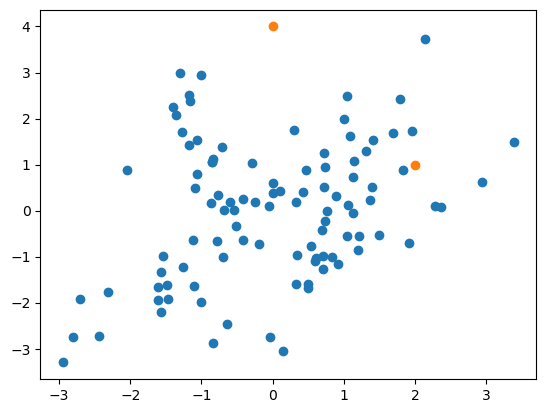

In [15]:
plt.scatter([point[0] for point in vectors], [point[1] for point in vectors])
plt.scatter([0, 2], [4, 1])

In [26]:
def calc_distance(point_A, point_B):
    x_A, y_A = point_A
    x_B, y_B = point_B

    distance = ((x_B - x_A)**2 + (y_B - y_A)**2)**(1/2)
    return distance


def calc_new_centroid(vector_group):
    length = len(vector_group)
    x_sum = sum([vector[0] for vector in vector_group])
    y_sum = sum([vector[1] for vector in vector_group])

    x_coord = x_sum / length
    y_coord = y_sum / length

    return [x_coord, y_coord]


def train(vectors, centroid_A, centroid_B):
    
    current_centroid_A = centroid_A.copy()
    current_centroid_B = centroid_B.copy()

    group_A = []
    group_B = []

    for vector in vectors:
        distance_to_A = calc_distance(vector, current_centroid_A)
        distance_to_B = calc_distance(vector, current_centroid_B)

        if distance_to_A > distance_to_B:
            group_A.append(vector)
        else:
            group_B.append(vector)
    
    
    current_centroid_A = calc_new_centroid(group_A)
    current_centroid_B = calc_new_centroid(group_B)

    return (current_centroid_A, current_centroid_B)

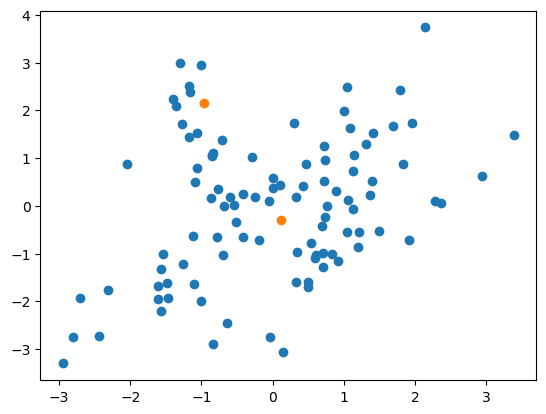

In [32]:
new_centroid_A, new_centroid_B = train(vectors=vectors, centroid_A=[0, 4], centroid_B=[2, 1])

plt.scatter([point[0] for point in vectors], [point[1] for point in vectors])
plt.scatter(
    [new_centroid_A[0], new_centroid_B[0]],
    [new_centroid_A[1], new_centroid_B[1]],
    )

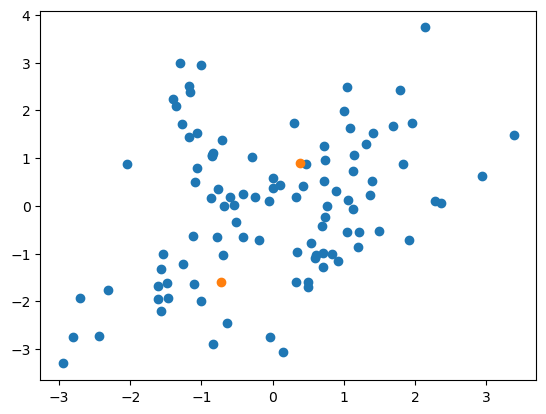

In [63]:
new_centroid_A, new_centroid_B = train(vectors=vectors, centroid_A=new_centroid_A, centroid_B=new_centroid_B)

plt.scatter([point[0] for point in vectors], [point[1] for point in vectors])
plt.scatter(
    [new_centroid_A[0], new_centroid_B[0]],
    [new_centroid_A[1], new_centroid_B[1]],
    )